# Machine Learning workflow


In [1]:
from preprocessing import read_tpm, read_metadata
import numpy as np
import pandas as pd


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, StratifiedKFold, GridSearchCV

# scores
from sklearn.metrics import accuracy_score, precision_score, recall_score, balanced_accuracy_score, f1_score, matthews_corrcoef
from sklearn.metrics import classification_report, confusion_matrix, make_scorer

# classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

## Read Data

In [2]:
inpath = "/Users/susanne/Documents/Master/TPM_TCGA_PAAD_GTEX_pancreas.txt"
metadata = "/Users/susanne/Documents/Datasets_Metadata/new_TCGA_PAAD_metadata.csv"
sample_ids, gene_ids, feature_names, raw_data = read_tpm(inpath)

# Convert data to numpy array
data_arr = np.array(raw_data, dtype=float)
# Transpose (n_samples, n_features)
data = np.transpose(data_arr)

# METADATA
labels, target, target_names = read_metadata(metadata, sample_ids)

##  Split Test / Train
Using all features

In [13]:
# Split Train and Test data (80:20)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

## Feature Scaling Training data

In [14]:
scaler = MinMaxScaler()
scaled_X_train = scaler.fit_transform(X_train)

## Train 2 Classifiers: SVM, RandomForest Grid Search
 
Grid Search already performs cross validation of the training data in smaller folds.

In [15]:
scorers = {'matthews': make_scorer(matthews_corrcoef),
          'balanced': make_scorer(balanced_accuracy_score)}

######################################################################################################
# LINEAR SVC

svc_clf = LinearSVC()
svc_grid = [ {'C': np.linspace(0.1, 1.0, num=10)} ]
svc_search = GridSearchCV(svc_clf, svc_grid, cv=5, return_train_score=True)   #, scoring=make_scorer(matthews_corrcoef)
svc_search.fit(scaled_X_train, y_train)
print("Best params: ", svc_search.best_params_)
print("Best estimator: ", svc_search.best_estimator_)
svc_cvres = pd.DataFrame.from_dict(svc_search.cv_results_)


######################################################################################################
# RANDOM FOREST
forest_clf = RandomForestClassifier()
tree_grid = [ {'n_estimators':[5, 10, 20, 50, 100], 'max_features':[5, 10, 20, 50, 100, 200, 500]} ]
tree_search = GridSearchCV(forest_clf, tree_grid, cv=5, return_train_score=True) # , scoring=make_scorer(matthews_corrcoef)
tree_search.fit(scaled_X_train, y_train)
print("Best params: ", tree_search.best_params_)
print("Best estimator: ", tree_search.best_estimator_)

# cross_val_scores available for each combination
tree_cvres = pd.DataFrame.from_dict(tree_search.cv_results_)

    
# extract feature importances: which genes most informative?
tree_feature_importances = tree_search.best_estimator_.feature_importances_

# print(most important features with their names)
df_tree_feature_importances = pd.DataFrame(sorted(zip(tree_feature_importances, gene_ids, feature_names), reverse=True), columns=['Feature Importance', 'Gene ID', 'Gene Name'])
df_tree_feature_importances





Best params:  {'C': 0.1}
Best estimator:  LinearSVC(C=0.1)
Best params:  {'max_features': 500, 'n_estimators': 10}
Best estimator:  RandomForestClassifier(max_features=500, n_estimators=10)


Feature Importance          Gene ID      Gene Name
0                0.098663  ENSG00000171877          FRMD5
1                0.098647  ENSG00000227376        FTH1P16
2                0.096065  ENSG00000214653      HNRNPA3P3
3                0.096062  ENSG00000242262  RP11-100N21.1
4                0.095996  ENSG00000228797       FAM207BP
...                   ...              ...            ...
63670            0.000000  ENSG00000000460       C1orf112
63671            0.000000  ENSG00000000457          SCYL3
63672            0.000000  ENSG00000000419           DPM1
63673            0.000000  ENSG00000000005           TNMD
63674            0.000000  ENSG00000000003         TSPAN6

[63675 rows x 3 columns]

In [16]:
svc_cvres.iloc[:, 5:]

params  split0_test_score  split1_test_score  \
0                  {'C': 0.1}                1.0                1.0   
1                  {'C': 0.2}                1.0                1.0   
2  {'C': 0.30000000000000004}                1.0                1.0   
3                  {'C': 0.4}                1.0                1.0   
4                  {'C': 0.5}                1.0                1.0   
5                  {'C': 0.6}                1.0                1.0   
6   {'C': 0.7000000000000001}                1.0                1.0   
7                  {'C': 0.8}                1.0                1.0   
8                  {'C': 0.9}                1.0                1.0   
9                  {'C': 1.0}                1.0                1.0   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0                1.0           0.966667           0.966102         0.986554   
1                1.0           0.966667           0.966102         0.986554   
2                1.0           0.966667           0.966102         0.986554   
3                1.0           0.966667           0.966102         0.986554   
4                1.0           0.966667           0.966102         0.986554   
5                1.0           0.966667           0.966102         0.986554   
6                1.0           0.966667           0.966102         0.986554   
7                1.0           0.966667           0.966102         0.986554   
8                1.0           0.966667           0.966102         0.986554   
9                1.0           0.966667           0.966102         0.986554   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.016469                1                 1.0                 1.0   
1        0.016469                1                 1.0                 1.0   
2        0.016469                1                 1.0                 1.0   
3        0.016469                1                 1.0                 1.0   
4        0.016469                1                 1.0                 1.0   
5        0.016469                1                 1.0                 1.0   
6        0.016469                1                 1.0                 1.0   
7        0.016469                1                 1.0                 1.0   
8        0.016469                1                 1.0                 1.0   
9        0.016469                1                 1.0                 1.0   

   split2_train_score  split3_train_score  split4_train_score  \
0                 1.0                 1.0                 1.0   
1                 1.0                 1.0                 1.0   
2                 1.0                 1.0                 1.0   
3                 1.0                 1.0                 1.0   
4                 1.0                 1.0                 1.0   
5                 1.0                 1.0                 1.0   
6                 1.0                 1.0                 1.0   
7                 1.0                 1.0                 1.0   
8                 1.0                 1.0                 1.0   
9                 1.0                 1.0                 1.0   

   mean_train_score  std_train_score  
0               1.0              0.0  
1               1.0              0.0  
2               1.0              0.0  
3               1.0              0.0  
4               1.0              0.0  
5               1.0              0.0  
6               1.0              0.0  
7               1.0              0.0  
8               1.0              0.0  
9               1.0              0.0

In [17]:
tree_cvres.iloc[:,6:]

params  split0_test_score  \
0       {'max_features': 5, 'n_estimators': 5}                1.0   
1      {'max_features': 5, 'n_estimators': 10}                1.0   
2      {'max_features': 5, 'n_estimators': 20}                1.0   
3      {'max_features': 5, 'n_estimators': 50}                1.0   
4     {'max_features': 5, 'n_estimators': 100}                1.0   
5      {'max_features': 10, 'n_estimators': 5}                1.0   
6     {'max_features': 10, 'n_estimators': 10}                1.0   
7     {'max_features': 10, 'n_estimators': 20}                1.0   
8     {'max_features': 10, 'n_estimators': 50}                1.0   
9    {'max_features': 10, 'n_estimators': 100}                1.0   
10     {'max_features': 20, 'n_estimators': 5}                1.0   
11    {'max_features': 20, 'n_estimators': 10}                1.0   
12    {'max_features': 20, 'n_estimators': 20}                1.0   
13    {'max_features': 20, 'n_estimators': 50}                1.0   
14   {'max_features': 20, 'n_estimators': 100}                1.0   
15     {'max_features': 50, 'n_estimators': 5}                1.0   
16    {'max_features': 50, 'n_estimators': 10}                1.0   
17    {'max_features': 50, 'n_estimators': 20}                1.0   
18    {'max_features': 50, 'n_estimators': 50}                1.0   
19   {'max_features': 50, 'n_estimators': 100}                1.0   
20    {'max_features': 100, 'n_estimators': 5}                1.0   
21   {'max_features': 100, 'n_estimators': 10}                1.0   
22   {'max_features': 100, 'n_estimators': 20}                1.0   
23   {'max_features': 100, 'n_estimators': 50}                1.0   
24  {'max_features': 100, 'n_estimators': 100}                1.0   
25    {'max_features': 200, 'n_estimators': 5}                1.0   
26   {'max_features': 200, 'n_estimators': 10}                1.0   
27   {'max_features': 200, 'n_estimators': 20}                1.0   
28   {'max_features': 200, 'n_estimators': 50}                1.0   
29  {'max_features': 200, 'n_estimators': 100}                1.0   
30    {'max_features': 500, 'n_estimators': 5}                1.0   
31   {'max_features': 500, 'n_estimators': 10}                1.0   
32   {'max_features': 500, 'n_estimators': 20}                1.0   
33   {'max_features': 500, 'n_estimators': 50}                1.0   
34  {'max_features': 500, 'n_estimators': 100}                1.0   

    split1_test_score  split2_test_score  split3_test_score  \
0            0.983333           1.000000           0.933333   
1            1.000000           0.983333           0.950000   
2            1.000000           1.000000           0.966667   
3            1.000000           1.000000           0.966667   
4            1.000000           1.000000           0.966667   
5            0.983333           0.983333           0.950000   
6            0.966667           1.000000           0.966667   
7            1.000000           1.000000           0.966667   
8            1.000000           1.000000           0.966667   
9            1.000000           1.000000           0.966667   
10           0.983333           1.000000           0.966667   
11           1.000000           0.983333           0.966667   
12           1.000000           1.000000           0.966667   
13           1.000000           1.000000           0.966667   
14           1.000000           1.000000           0.966667   
15           1.000000           1.000000           0.950000   
16           1.000000           1.000000           0.966667   
17           1.000000           1.000000           0.966667   
18           1.000000           1.000000           0.966667   
19           1.000000           1.000000           0.966667   
20           1.000000           1.000000           0.983333   
21           1.000000           1.000000           0.950000   
22           1.000000           1.000000           0.966667   
23           1.000000           1.000000   

In [18]:
df_tree_feature_importances.head(n=10)

Feature Importance          Gene ID      Gene Name
0            0.098663  ENSG00000171877          FRMD5
1            0.098647  ENSG00000227376        FTH1P16
2            0.096065  ENSG00000214653      HNRNPA3P3
3            0.096062  ENSG00000242262  RP11-100N21.1
4            0.095996  ENSG00000228797       FAM207BP
5            0.093489  ENSG00000215102        TERF1P4
6            0.093420  ENSG00000106367          AP1S1
7            0.092276  ENSG00000213757   CTC-451P13.1
8            0.089732  ENSG00000236603          RANP1
9            0.089540  ENSG00000224520        KRT8P45

## Evaluate Best Model on Test data

In [19]:
######################################################################################################
# SCALE TEST DATA 
scaled_X_test = scaler.transform(X_test)


######################################################################################################
# EVALUATE LINEAR SVC MODEL
svc_model = svc_search.best_estimator_
y_svc_predictions = svc_model.predict(scaled_X_test)
print(classification_report(y_test, y_svc_predictions, target_names=['normal', 'tumor']))


######################################################################################################
# EVALUATE RANDOM FOREST MODEL
tree_model = tree_search.best_estimator_
# make predictions
y_tree_predictions = tree_model.predict(scaled_X_test)
# evaluate predictions
print(classification_report(y_test, y_tree_predictions, target_names=['normal', 'tumor']))


              precision    recall  f1-score   support

      normal       1.00      0.97      0.99        38
       tumor       0.97      1.00      0.99        37

    accuracy                           0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75

              precision    recall  f1-score   support

      normal       1.00      0.97      0.99        38
       tumor       0.97      1.00      0.99        37

    accuracy                           0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



In [20]:
print("Matthews CorrelationCoefficient on predictions with SVC %.2f" %(matthews_corrcoef(y_test, y_svc_predictions)))
print("Matthews CorrelationCoefficient on predictions with Random Forest %.2f" %(matthews_corrcoef(y_test, y_tree_predictions)))

print("Balanced Accuracy score %.2f" %(balanced_accuracy_score(y_test, y_svc_predictions)))
print("Balanced Accuracy score %.2f" %(balanced_accuracy_score(y_test, y_tree_predictions)))

Matthews CorrelationCoefficient on predictions with SVC 0.97
Matthews CorrelationCoefficient on predictions with Random Forest 0.97
Balanced Accuracy score 0.99
Balanced Accuracy score 0.99


## Confustion Matrix, ROC, AUC 

SVC Confusion Matrix
[[37  1]
 [ 0 37]]
Tree Confusion Matrix
[[37  1]
 [ 0 37]]


Text(0.5, 1.0, 'ROC curve comparison')

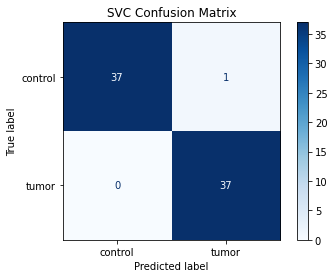

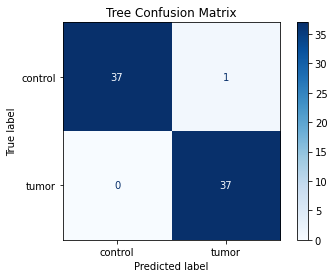

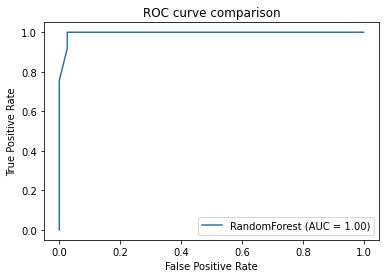

In [21]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

######################################################################################################
# # EVALUATE LINEAR SVC MODEL
disp_svc = plot_confusion_matrix(svc_model, scaled_X_test, y_test,
                             display_labels=('control', 'tumor'),
                              cmap=plt.cm.Blues)


disp_svc.ax_.set_title('SVC Confusion Matrix')
print('SVC Confusion Matrix')
print(disp_svc.confusion_matrix)


######################################################################################################
# EVALUATE RANDOM FOREST MODEL
disp_tree = plot_confusion_matrix(tree_model, scaled_X_test, y_test,
                             display_labels=('control', 'tumor'),
                              cmap=plt.cm.Blues)


disp_tree.ax_.set_title('Tree Confusion Matrix')
print('Tree Confusion Matrix')
print(disp_tree.confusion_matrix)




######################################################################################################
# ROC AUC
#svc_disp = plot_roc_curve(svc_search, scaled_X_test, y_test, name='SVC')
tree_disp = plot_roc_curve(tree_search, scaled_X_test, y_test, name='RandomForest') # ax=svc_disp.ax_
plt.title("ROC curve comparison")
# tree_disp.figure_.suptitle("ROC curve comparison")
